In [310]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%pip install plotly
%pip install cufflinks
%pip install chart_studio

import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [311]:
vendas = pd.read_excel(r'C:\Users\Ior Sinigaglia\Desktop\DNC Ciência de Dados\Python\Bibliotecas Python\varejo.xlsx')

In [312]:
vendas.head()


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [313]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [314]:
vendas.groupby('idcanalvenda').idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

vendas.groupby('idcanalvenda').idcompra.nunique() 

aqui estou pegando a coluna 'idcanalvenda' e contando quantos clientes compraram por canal de venda. A expressão .idcompra.nunique() conta quantos ID de clientes tem para cada categoria na coluna idcanlvenda

In [315]:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo") essa expressão serve para substituição de dados por outros

In [316]:
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [317]:
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique().reset_index()

,Nome_Departamento,idcompra
0,Acessorios_e_Inovacoes,3548
1,Alimentos,2
2,Ar_e_Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza_e_Saude,4626
7,Brinquedos,1320
8,"Cama,_Mesa_e_Banho",153
9,Casa_e_Construcao,263


In [318]:
vendas_sem_nulo=vendas.dropna()
vendas_sem_nulo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [319]:
media_preco = vendas["Preço"].mean()

In [320]:
vendas["Preço"].fillna(media_preco, inplace=True)
vendas["estado"].fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [321]:
preco_errado = vendas.query("Preço > Preço_com_frete")
vendas_correto = vendas.query("Preço < Preço_com_frete")
vendas_correto

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060
...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206


In [322]:
vendas_correto.query("Nome_Departamento == 'Esporte_e_Lazer' & estado == 'SP'").describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,168.000000,168.000000,168.00000,168.000000
mean,265130.744048,1070.083095,1098.71319,14368.571429
std,140435.252208,617.138494,620.66244,7890.233136
min,2145.000000,10.896000,16.11200,210.000000
25%,157955.000000,527.200000,545.32000,7717.500000
50%,253702.500000,1108.008000,1136.24800,15281.000000
75%,380616.250000,1599.200000,1618.88400,20538.000000
max,496910.000000,2399.200000,2432.74400,27837.000000


In [323]:
dep_maisvendisos = vendas_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()
dep_maisvendisos

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


Respondido acima departamentos mais vendidos

In [324]:
agg_media_precocomfrete_depto = vendas_correto.groupby("Nome_Departamento").Preço_com_frete.agg('mean').sort_values(ascending=False).reset_index().round(2)
agg_media_precocomfrete_depto

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


Respondido acima Média de Preço com frete por nome de departamento

In [325]:
vendas_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [326]:
data_vendas=vendas_correto.groupby("Data").idcompra.nunique().sort_index(ascending=True).reset_index()
data_vendas

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


In [327]:
vendas_correto["Mês"] = vendas_correto["Data"].dt.strftime('%Y-%m')
vendas_correto

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,2023-03
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,2023-03
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2023-02
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,2023-03
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2023-02
...,...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429,2023-01
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26,2023-04
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128,2023-03
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206,2023-04


In [328]:
vendas_por_mes=vendas_correto.groupby("Mês").idcompra.nunique().sort_index(ascending=True).reset_index()
vendas_por_mes

,Mês,idcompra
0,2023-01,5309
1,2023-02,5138
2,2023-03,5590
3,2023-04,5454


respondendo acima quantidade de vendas por mês

In [329]:
clientes = pd.read_excel(r"C:\Users\Ior Sinigaglia\Desktop\DNC Ciência de Dados\Python\Bibliotecas Python\cliente_varejo.xlsx")
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [330]:
clientes.describe()

,cliente_Log,idade,renda
count,26425.000000,26425.000000,26425.000000
mean,13937.414456,53.412564,8241.470350
std,8066.941892,20.698825,3899.871482
min,1.000000,18.000000,1500.000000
25%,6920.000000,35.000000,4859.000000
50%,13946.000000,53.000000,8234.000000
75%,20926.000000,71.000000,11629.000000
max,27982.000000,89.000000,15000.000000


In [331]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [332]:
clientes=clientes.astype({"renda":"float"})

In [333]:
vendas_cliente = vendas_correto.merge(clientes, how="left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,2023-03,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,2023-03,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,2023-03,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,2023-03,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2023-02,78,6596.0


In [334]:
agg_renda_canal = round(vendas_cliente.groupby("idcanalvenda").renda.agg("mean").sort_values(ascending=False).reset_index(),2)
agg_renda_canal

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


Respondendo acima a pergunta média de renda para cada tipo de canal de venda

In [335]:
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira").idade.agg("mean").sort_values(ascending=False).reset_index(),2)

respondendo acima a pergunta média de idade de clientes por bandeira

Text(0.5, 1.0, 'Idade Média por bandeira')

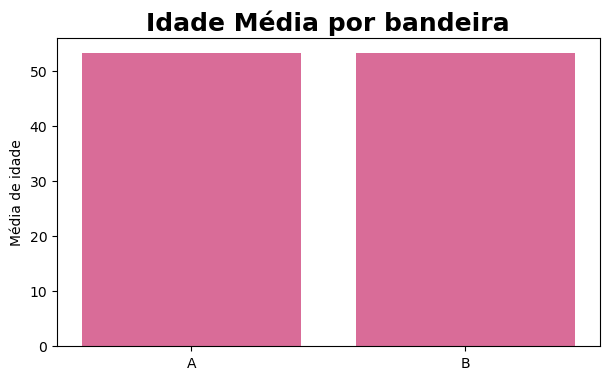

In [336]:
fig = plt.figure(figsize=(7, 4))
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="#D96C98")
plt.ylabel("Média de idade")
plt.title("Idade Média por bandeira", loc="center", fontsize=18, fontweight="bold", color="black")

Text(0.5, 0, 'Canal de Venda')

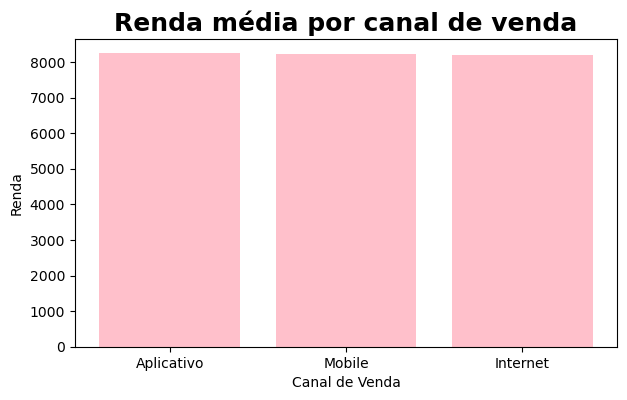

In [337]:
fig=plt.figure(figsize=(7,4))
plt.bar(agg_renda_canal["idcanalvenda"], agg_renda_canal["renda"], color="pink")
plt.title("Renda média por canal de venda", fontsize=18, fontweight="bold", color="black")
plt.ylabel("Renda")
plt.xlabel("Canal de Venda")

Text(0.5, 1.0, 'Data de vendas')

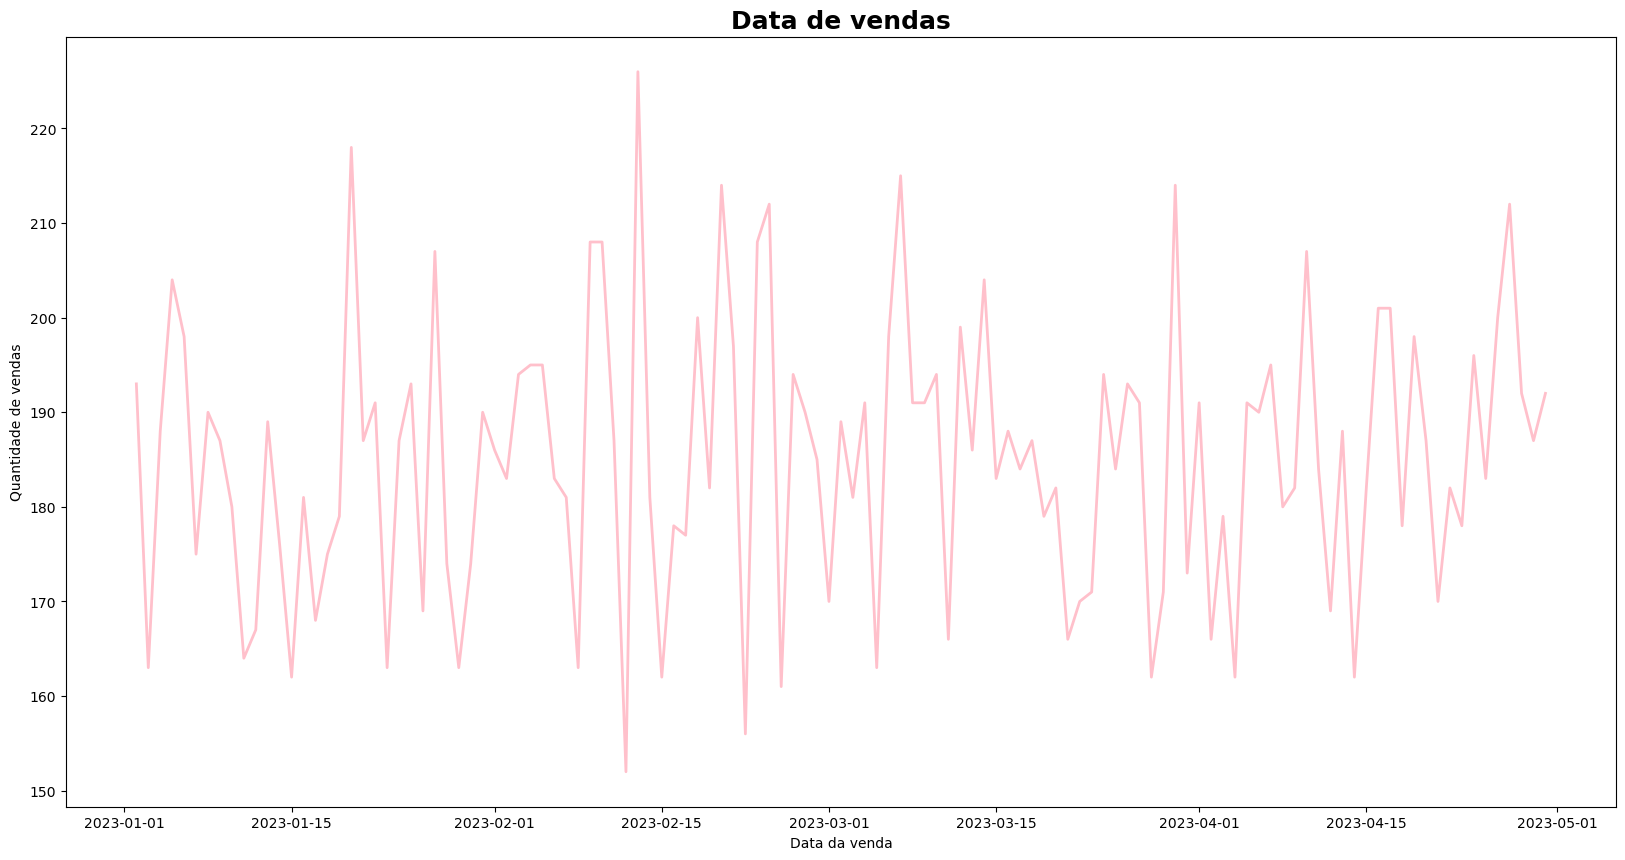

In [344]:
fig = plt.figure(figsize=(20,10))
plt.ylabel("Quantidade de vendas")
plt.xlabel("Data da venda")
plt.plot(data_vendas["Data"], data_vendas["idcompra"], color="pink", linewidth="2")
plt.ylabel("Quantidade de vendas")
plt.xlabel("Data da venda")
plt.title("Data de vendas", fontsize=18, fontweight='bold')

In [339]:
agg_media_precocomfrete_depto = vendas_correto.groupby("Nome_Departamento").Preço_com_frete.agg('mean').sort_values(ascending=False).reset_index().round(2)
agg_media_precocomfrete_depto

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


Text(0.5, 1.0, 'Preço com frete médio por departamento')

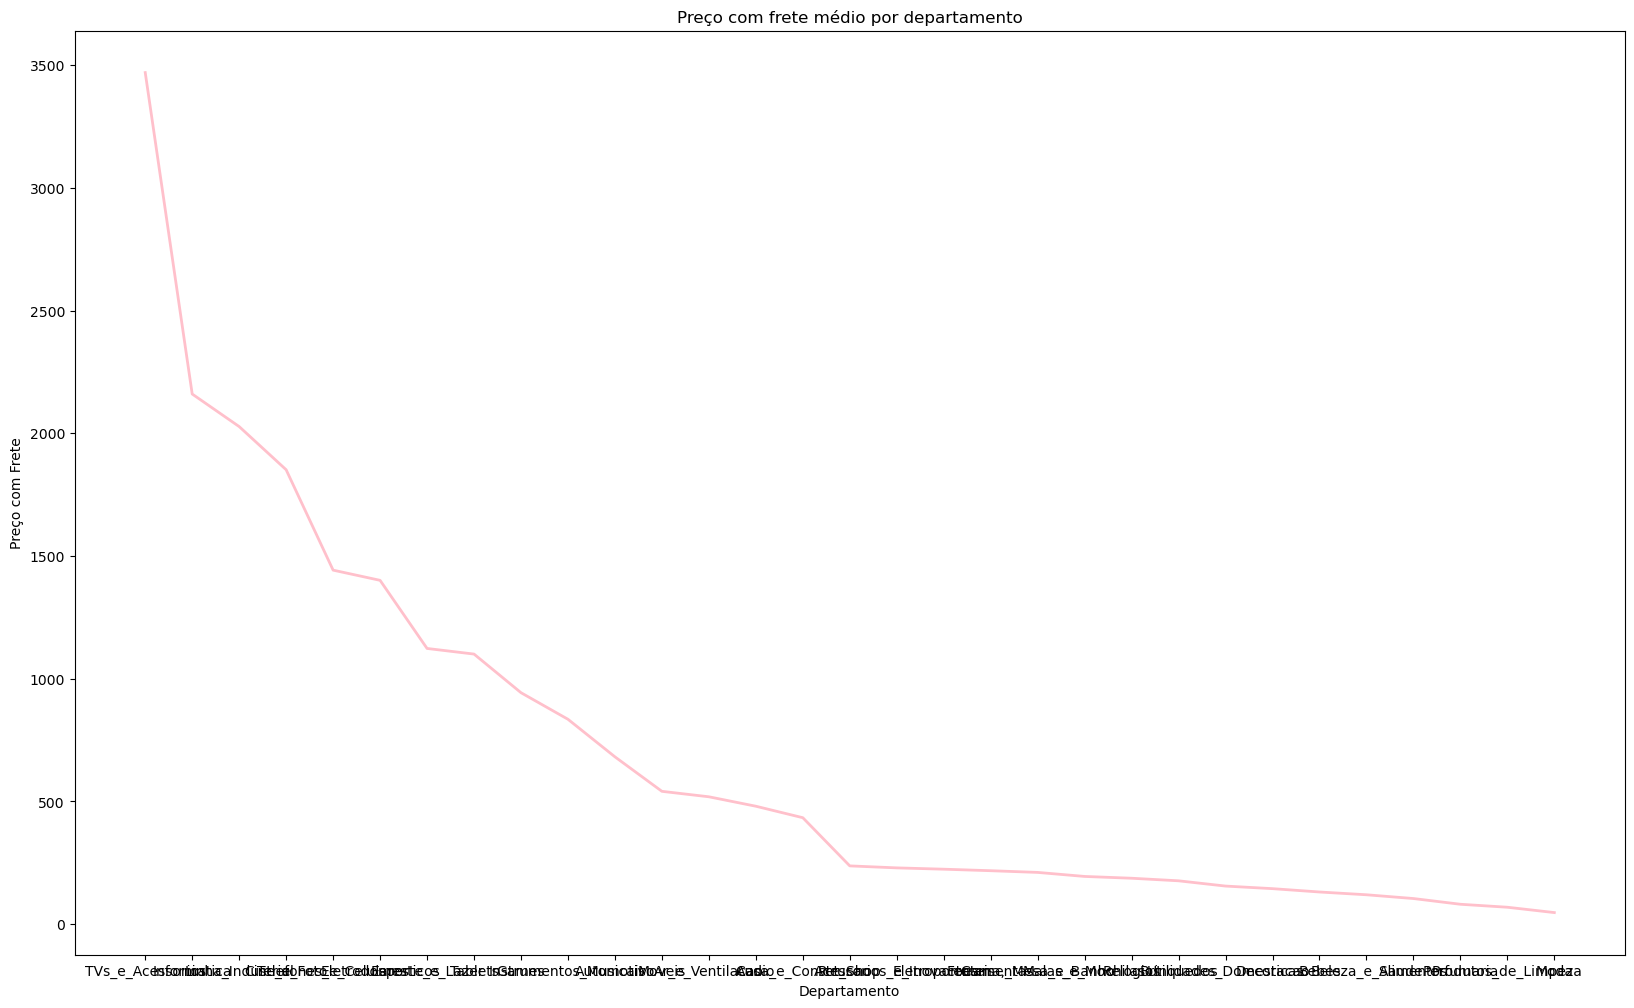

In [340]:
fig = plt.figure(figsize=(20,12))
plt.plot(agg_media_precocomfrete_depto["Nome_Departamento"], agg_media_precocomfrete_depto["Preço_com_frete"], color="pink", linewidth=2)
plt.xlabel("Departamento")
plt.ylabel("Preço com Frete")
plt.title("Preço com frete médio por departamento")

In [346]:
px.bar(agg_idade_bandeira, x="bandeira", y="idade")

In [348]:
px.line(data_vendas, x="Data", y="idcompra")

In [370]:
px.bar(agg_media_precocomfrete_depto, x="Nome_Departamento", y="Preço_com_frete", title="Preço médio por categoria", labels={"Preço_com_frete":"Preço Médio", "Nome_Departamento":"Departamentos"})